In [3]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, AncillaRegister
from qiskit.quantum_info import Statevector, Operator
from qiskit.circuit.library import UnitaryGate
from qiskit.synthesis import OneQubitEulerDecomposer

import matplotlib.pyplot as plt

import numpy as np

# Select QROM Implementation

Implementing the "select" QROM method discussed in class: assuming our boolean input function f takes in bitstrings of length n and outputs bitstrings of length d (also given as inputs), we output a circuit U which "loads in" the values for f(x), given x. 

In [ ]:
def select_qrom(n, d, f):
    #n: number of input qubits
    #d: number of output qubits
    #f: function mapping bitstrings of length n to bitstrings of length d

    quantum_registerX = QuantumRegister(n, name="x")
    quantum_registerY = QuantumRegister(d, name="y")
    qrom_circuit = QuantumCircuit(quantum_registerX, quantum_registerY, name="QROM")

    for i in range(2**n):
        x_bits = format(i, f'0{n}b')  
        f_x = f(x_bits)    
        if '1' in f_x:
            for i in range(n):
                if( x_bits[i] == '0'):
                    qrom_circuit.x(quantum_registerX[i])

            for j in range(d):
                if f_x[j] == '1':
                    qrom_circuit.mcx([quantum_registerX[k] for k in range(n)], quantum_registerY[j])
            for i in range(n):
                if( x_bits[i] == '0'):
                    qrom_circuit.x(quantum_registerX[i])
                

    return qrom_circuit


## testing select method code

In [22]:
#n = 2, d = 2 example function
def test_function(x_bits):
    # Example function: f(00) = 10, f(01) = 01, f(10) = 11, f(11) = 00
    mapping = {
        '00': '10',
        '01': '01',
        '10': '11',
        '11': '00'
    }
    return mapping[x_bits]

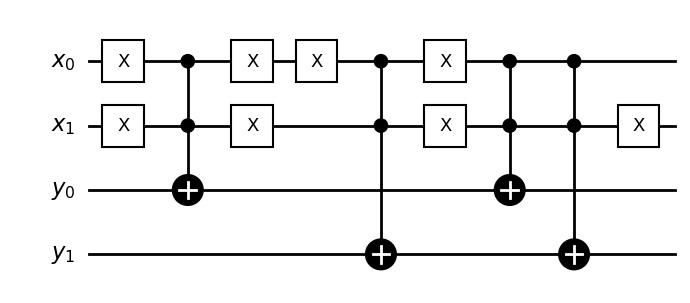

In [23]:
yy = select_qrom(2, 2, test_function)
yy.draw(output="mpl", style="bw")

In [24]:
#n = 3, d = 5 example function
def test_function_3_5(x_bits):
    # Example function: f(000) = 10101, f(001) = 01010, f(010) = 11100, f(011) = 00011, f(100) = 11011, f(101) = 00100, f(110) = 10010, f(111) = 01101
    mapping = {
        '000': '10101',
        '001': '01010',
        '010': '11100',
        '011': '00011',
        '100': '11011',
        '101': '00100',
        '110': '10010',
        '111': '01101'
    }
    return mapping[x_bits]

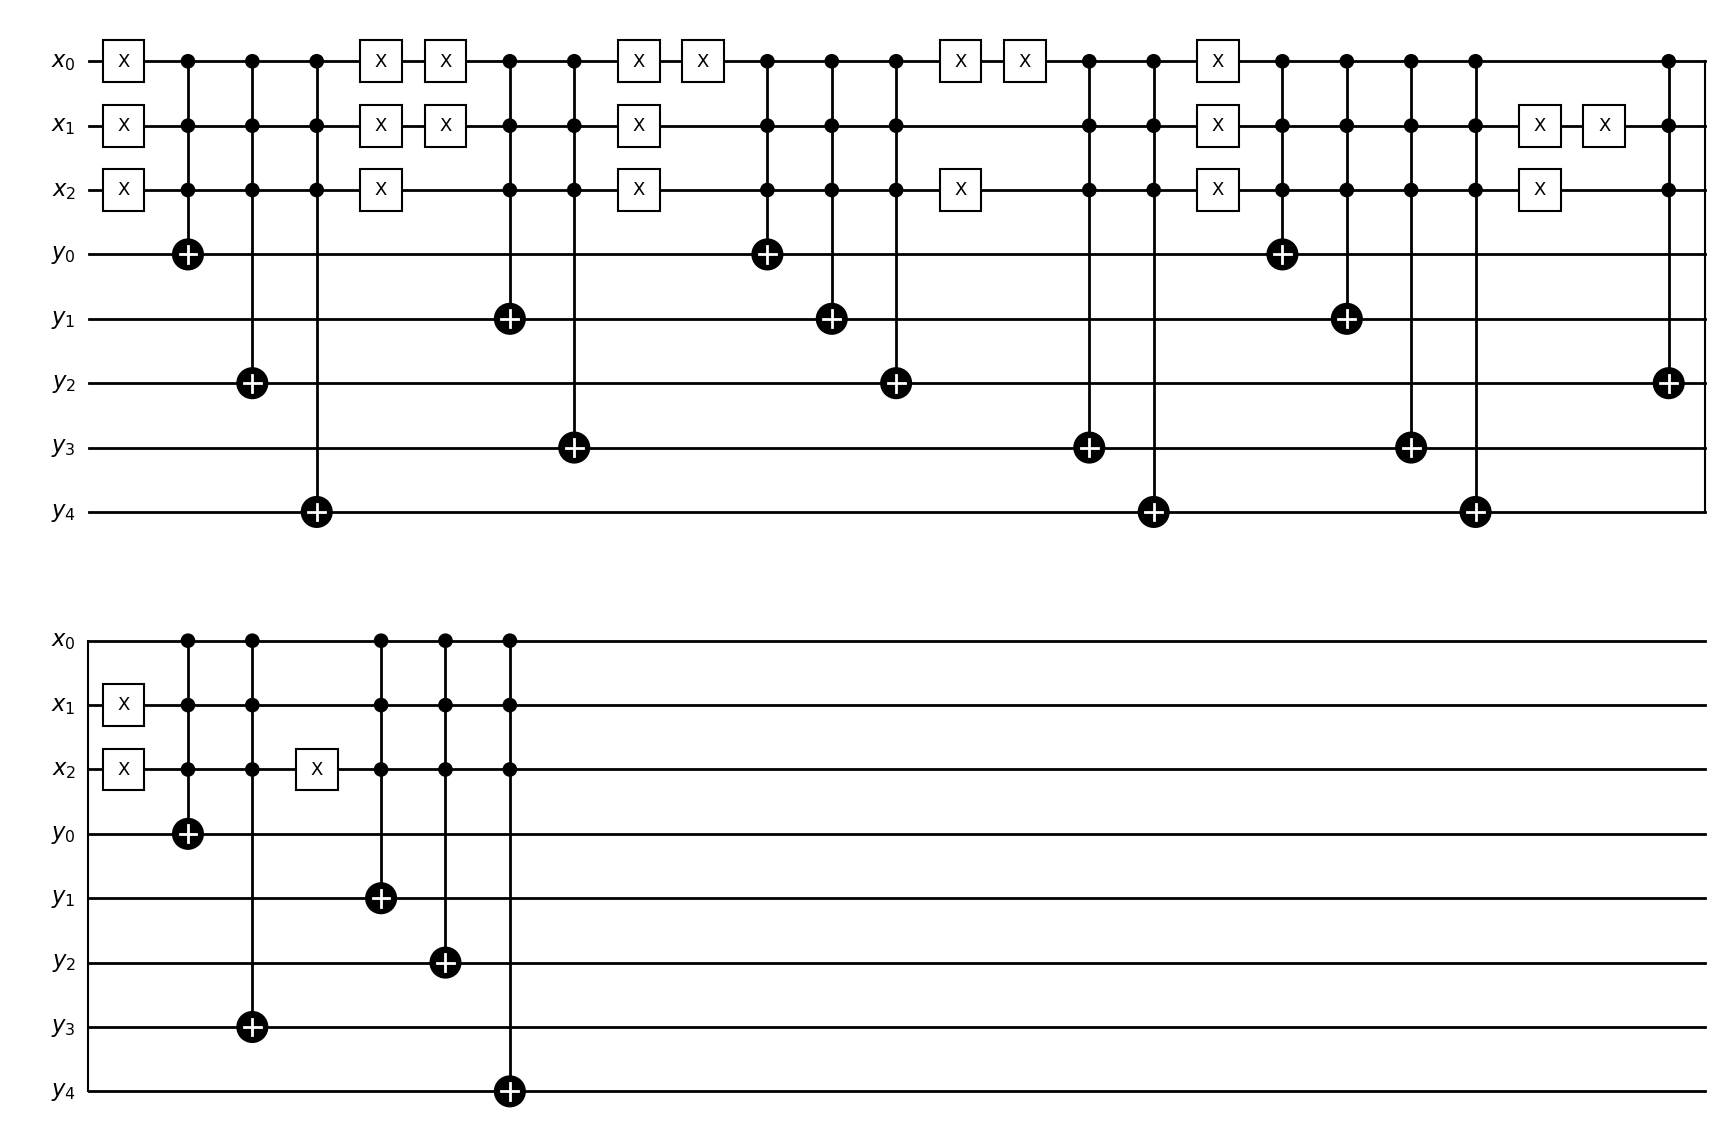

In [25]:
y_3_5 = select_qrom(3, 5, test_function_3_5)
y_3_5.draw(output="mpl", style="bw")

Looks good, but very inefficient! One potential step in the right direction is applying the select-swap method

# Select-Swap QROM Implementation